In [68]:
import pandas as pd

In [69]:
# Load datasets
patients_df = pd.read_csv("PatientData.csv")
food_df = pd.read_csv("FoodData.csv")

In [70]:
# Display Data
print("Patient Data")
display(patients_df.head())

print("Fodd Data")
display(food_df.head())

Patient Data


,User ID,Age,Gender,WeightKG,HeightCM,HeightM,BMI,DiabeticPeriod,Goals,HbA1c,FBS,RBS
0,1.0,65.0,Male,90.0,175.0,1.75,29.39,10.0,Blood sugar control,7.5,7.2,10.0
1,2.0,48.0,Female,75.0,160.0,1.60,29.30,5.0,Blood sugar control,6.8,6.1,8.9
2,3.0,52.0,Male,85.0,180.0,1.80,26.23,8.0,Blood sugar control,7.2,6.7,9.4
3,4.0,60.0,Female,80.0,165.0,1.65,29.38,12.0,Blood sugar control,8.0,7.8,10.6
4,5.0,42.0,Male,95.0,178.0,1.78,29.98,3.0,Blood sugar control,6.5,5.6,8.3


Fodd Data


,FoodItem,Calories,Protein,Carbohydrates,Fat,Fiber,GI,GL,Food_Category
0,Apple,52,0.3,13.8,0.2,2.4,38,5,Fruit
1,Banana,89,1.1,22.8,0.3,2.6,51,12,Fruit
2,Orange,47,0.9,11.8,0.2,2.4,43,5,Fruit
3,Strawberries,32,0.7,7.7,0.3,2.0,40,3,Fruit
4,Grapes,69,0.7,18.1,0.2,0.9,59,10,Fruit


In [71]:
# Check for missing values
print("Missing Values in patient Data")
print(patients_df.isnull())

print("Missing values in Food Data")
print(food_df.isnull())

Missing Values in patient Data
      User ID    Age  Gender  WeightKG  HeightCM  HeightM    BMI  \
0       False  False   False     False     False    False  False   
1       False  False   False     False     False    False  False   
2       False  False   False     False     False    False  False   
3       False  False   False     False     False    False  False   
4       False  False   False     False     False    False  False   
...       ...    ...     ...       ...       ...      ...    ...   
2795    False  False   False     False     False    False  False   
2796    False  False   False     False     False    False  False   
2797    False  False   False     False     False    False  False   
2798    False  False   False     False     False    False  False   
2799     True   True    True      True      True     True   True   

      DiabeticPeriod  Goals  HbA1c    FBS    RBS  
0              False  False  False  False  False  
1              False  False  False  False  False  

In [72]:
# Drop missing values in Patient Data
patients_df = patients_df.dropna()

In [73]:
print("Missing values after dropping rows:")
print(patients_df.isnull())

Missing values after dropping rows:
      User ID    Age  Gender  WeightKG  HeightCM  HeightM    BMI  \
0       False  False   False     False     False    False  False   
1       False  False   False     False     False    False  False   
2       False  False   False     False     False    False  False   
3       False  False   False     False     False    False  False   
4       False  False   False     False     False    False  False   
...       ...    ...     ...       ...       ...      ...    ...   
2794    False  False   False     False     False    False  False   
2795    False  False   False     False     False    False  False   
2796    False  False   False     False     False    False  False   
2797    False  False   False     False     False    False  False   
2798    False  False   False     False     False    False  False   

      DiabeticPeriod  Goals  HbA1c    FBS    RBS  
0              False  False  False  False  False  
1              False  False  False  False  Fa

In [74]:
# Drop Unnecceasy values
patients_df = patients_df.drop(columns = ["HeightCM"], errors = "ignore")
print(patients_df.head())

   User ID   Age  Gender  WeightKG  HeightM    BMI  DiabeticPeriod  \
0      1.0  65.0    Male      90.0     1.75  29.39            10.0   
1      2.0  48.0  Female      75.0     1.60  29.30             5.0   
2      3.0  52.0    Male      85.0     1.80  26.23             8.0   
3      4.0  60.0  Female      80.0     1.65  29.38            12.0   
4      5.0  42.0    Male      95.0     1.78  29.98             3.0   

                 Goals  HbA1c  FBS   RBS  
0  Blood sugar control    7.5  7.2  10.0  
1  Blood sugar control    6.8  6.1   8.9  
2  Blood sugar control    7.2  6.7   9.4  
3  Blood sugar control    8.0  7.8  10.6  
4  Blood sugar control    6.5  5.6   8.3  


In [75]:
# Data Normalization
# Linear Scaling
from sklearn.preprocessing import MinMaxScaler

#Define scaler
scaler = MinMaxScaler()

# Columns to normalize
patients_cols_to_normalize = ["WeightKG", "HeightM", "BMI", "HbA1c", "FBS", "RBS"]
food_cols_to_normalize = ["Calories ", "Protein", "Carbohydrates ","Fat", "Fiber", "GI", "GL"]

# Applying MinMax Scaling
patients_df[patients_cols_to_normalize] = scaler.fit_transform(patients_df[patients_cols_to_normalize])
food_df[food_cols_to_normalize] = scaler.fit_transform(food_df[food_cols_to_normalize])

# Check results
print("Normalized Patient Data:")
display(patients_df.head())

print("\nNormalized Food Data:")
display(food_df.head())

Normalized Patient Data:


,User ID,Age,Gender,WeightKG,HeightM,BMI,DiabeticPeriod,Goals,HbA1c,FBS,RBS
0,1.0,65.0,Male,0.600000,0.625,0.689581,10.0,Blood sugar control,0.516129,0.324324,0.702703
1,2.0,48.0,Female,0.400000,0.250,0.685690,5.0,Blood sugar control,0.290323,0.175676,0.554054
2,3.0,52.0,Male,0.533333,0.750,0.552962,8.0,Blood sugar control,0.419355,0.256757,0.621622
3,4.0,60.0,Female,0.466667,0.375,0.689148,12.0,Blood sugar control,0.677419,0.405405,0.783784
4,5.0,42.0,Male,0.666667,0.700,0.715089,3.0,Blood sugar control,0.193548,0.108108,0.472973



Normalized Food Data:


,FoodItem,Calories,Protein,Carbohydrates,Fat,Fiber,GI,GL,Food_Category
0,Apple,0.057903,0.000000,0.276,0.003067,0.069767,0.487179,0.227273,Fruit
1,Banana,0.115806,0.026059,0.456,0.004601,0.075581,0.653846,0.545455,Fruit
2,Orange,0.050078,0.019544,0.236,0.003067,0.069767,0.551282,0.227273,Fruit
3,Strawberries,0.026604,0.013029,0.154,0.004601,0.058140,0.512821,0.136364,Fruit
4,Grapes,0.084507,0.013029,0.362,0.003067,0.026163,0.756410,0.454545,Fruit


In [76]:
# Encoding categorical values
# Gender
patients_df["Gender"] = patients_df["Gender"].map({"Male":1, "Female":0})

In [77]:
# One-hot encode Food_Category
food_df = pd.get_dummies(food_df, columns=["Food_Category"])

In [78]:
print(patients_df.head())
print(food_df.head())

   User ID   Age  Gender  WeightKG  HeightM       BMI  DiabeticPeriod  \
0      1.0  65.0     1.0  0.600000    0.625  0.689581            10.0   
1      2.0  48.0     0.0  0.400000    0.250  0.685690             5.0   
2      3.0  52.0     1.0  0.533333    0.750  0.552962             8.0   
3      4.0  60.0     0.0  0.466667    0.375  0.689148            12.0   
4      5.0  42.0     1.0  0.666667    0.700  0.715089             3.0   

                 Goals     HbA1c       FBS       RBS  
0  Blood sugar control  0.516129  0.324324  0.702703  
1  Blood sugar control  0.290323  0.175676  0.554054  
2  Blood sugar control  0.419355  0.256757  0.621622  
3  Blood sugar control  0.677419  0.405405  0.783784  
4  Blood sugar control  0.193548  0.108108  0.472973  
       FoodItem  Calories    Protein  Carbohydrates        Fat     Fiber  \
0         Apple   0.057903  0.000000           0.276  0.003067  0.069767   
1        Banana   0.115806  0.026059           0.456  0.004601  0.075581   
2  

In [79]:
# Encode Goals
patients_df["Goals"] = 1
print(patients_df.head())

   User ID   Age  Gender  WeightKG  HeightM       BMI  DiabeticPeriod  Goals  \
0      1.0  65.0     1.0  0.600000    0.625  0.689581            10.0      1   
1      2.0  48.0     0.0  0.400000    0.250  0.685690             5.0      1   
2      3.0  52.0     1.0  0.533333    0.750  0.552962             8.0      1   
3      4.0  60.0     0.0  0.466667    0.375  0.689148            12.0      1   
4      5.0  42.0     1.0  0.666667    0.700  0.715089             3.0      1   

      HbA1c       FBS       RBS  
0  0.516129  0.324324  0.702703  
1  0.290323  0.175676  0.554054  
2  0.419355  0.256757  0.621622  
3  0.677419  0.405405  0.783784  
4  0.193548  0.108108  0.472973  


In [177]:
print(food_df.columns.tolist())


['FoodItem', 'Calories ', 'Protein', 'Carbohydrates ', 'Fat', 'Fiber', 'GI', 'GL', 'Food_Category_Dairy', 'Food_Category_Fruit', 'Food_Category_Grains', 'Food_Category_Meat', 'Food_Category_Nuts', 'Food_Category_Others', 'Food_Category_Vegetable']


In [15]:
food_df.columns = food_df.columns.str.strip()

In [ ]:
# Clustering - KMeans
# Load data
food_df = pd.read_csv("FoodData.csv")

# Strip whitespace from column names
food_df.columns = food_df.columns.str.strip()

food_cols_to_normalize = ["Calories", "Protein", "Carbohydrates", "Fat", "Fiber", "GI", "GL"]

food_features = food_df[food_cols_to_normalize]
kmeans = KMeans(n_clusters=6, random_state=42)
food_df['Cluster'] = kmeans.fit_predict(food_features)

# Display clustered data
print("Clustered Food Data:")
display(food_df.head())


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clustered Food Data:


,FoodItem,Calories,Protein,Carbohydrates,Fat,Fiber,GI,GL,Food_Category,Cluster
0,Apple,52,0.3,13.8,0.2,2.4,38,5,Fruit,5
1,Banana,89,1.1,22.8,0.3,2.6,51,12,Fruit,0
2,Orange,47,0.9,11.8,0.2,2.4,43,5,Fruit,5
3,Strawberries,32,0.7,7.7,0.3,2.0,40,3,Fruit,3
4,Grapes,69,0.7,18.1,0.2,0.9,59,10,Fruit,5


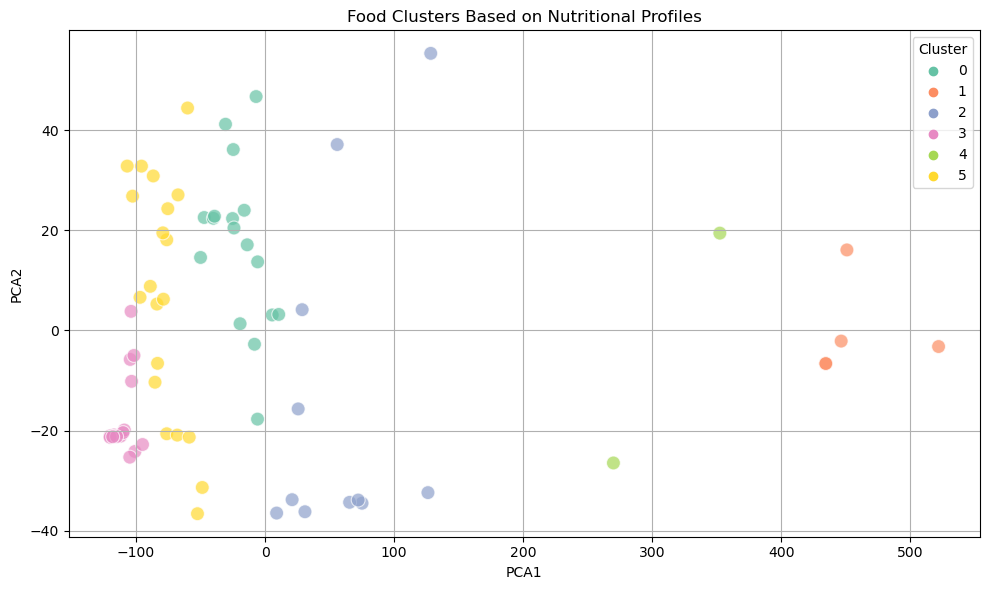

In [180]:
# Creating Food Clusters Visualizations Based on their Nutritional Contents
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(food_features)

food_df['PCA1'] = reduced_features[:, 0]
food_df['PCA2'] = reduced_features[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=food_df,
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set2',
    s=100,
    alpha=0.7
)
plt.title("Food Clusters Based on Nutritional Profiles")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
# Creating patient classifications
def categorize_patient(row):
    if row['HbA1c'] < 5.7 and row['FBS'] < 100:
        return "Normal"
    elif 5.7 <= row['HbA1c'] < 6.5 or 100 <= row['FBS'] < 126:
        return "PreDiabetic"
    else:
        return "Diabetic"

# Apply categorization
patients_df['GlycemicCategory'] = patients_df.apply(categorize_patient, axis=1)
print(patients_df[['HbA1c', 'FBS', 'GlycemicCategory']].head())


      HbA1c       FBS GlycemicCategory
0  0.516129  0.324324           Normal
1  0.290323  0.175676           Normal
2  0.419355  0.256757           Normal
3  0.677419  0.405405           Normal
4  0.193548  0.108108           Normal


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = patients_df[["HbA1c", "RBS", "FBS", "BMI"]]
y = patients_df["GlycemicCategory"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       556

    accuracy                           1.00       556
   macro avg       1.00      1.00      1.00       556
weighted avg       1.00      1.00      1.00       556



In [30]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [32]:
def classify_glycemic_control(row):
    if row["HbA1c"] <= 6.5 and row["FBS"] < 100 and row["RBS"] < 140:
        return "Well-controlled"
    elif row["HbA1c"] <= 8.0 and row["FBS"] < 130 and row["RBS"] < 180:
        return "Moderately-controlled"
    else:
        return "Poorly-controlled"

# Apply classification
patients_df["ControlLevel"] = patients_df.apply(classify_glycemic_control, axis=1)

# Preview
print(patients_df[["HbA1c", "FBS", "RBS", "ControlLevel"]].head())


      HbA1c       FBS       RBS     ControlLevel
0  0.516129  0.324324  0.702703  Well-controlled
1  0.290323  0.175676  0.554054  Well-controlled
2  0.419355  0.256757  0.621622  Well-controlled
3  0.677419  0.405405  0.783784  Well-controlled
4  0.193548  0.108108  0.472973  Well-controlled


In [37]:
def classify_patient(row):
    if row['HbA1c'] >= 8 or row['FBS'] >= 180:
        return 'Poor Control'
    elif 6.5 <= row['HbA1c'] < 8 or 130 <= row['FBS'] < 180:
        return 'Moderate Control'
    else:
        return 'Good Control'

patients_df['Glycemic_Status'] = patients_df.apply(classify_patient, axis=1)
print(patients_df[['HbA1c', 'FBS', 'Glycemic_Status']].head())

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
patients_df['Glycemic_Label'] = le.fit_transform(patients_df['Glycemic_Status'])

# Training the Classification Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Select features and target
X = patients_df[["HbA1c", "FBS", "BMI", "RBS", "Age"]]  # You can adjust this
y = patients_df['Glycemic_Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred, target_names=le.classes_))
print(confusion_matrix(y_test, y_pred))

      HbA1c       FBS Glycemic_Status
0  0.516129  0.324324    Good Control
1  0.290323  0.175676    Good Control
2  0.419355  0.256757    Good Control
3  0.677419  0.405405    Good Control
4  0.193548  0.108108    Good Control
              precision    recall  f1-score   support

Good Control       1.00      1.00      1.00       556

    accuracy                           1.00       556
   macro avg       1.00      1.00      1.00       556
weighted avg       1.00      1.00      1.00       556

[[556]]


In [ ]:
# Calculating  daily calorie needs
def estimate_calories(weight_kg, height_m, age, gender, activity_factor=1.3):
    height_cm = height_m * 100
    
    if gender == 1:  # Male
        bmr = 10 * weight_kg + 6.25 * height_cm - 5 * age + 5
    else:  # Female
        bmr = 10 * weight_kg + 6.25 * height_cm - 5 * age - 161
    
    return bmr * activity_factor

# Estimate Macronutrient Targets (45% carbs, 20% protein, 30% fat)
def get_macro_targets(calories):
    carbs_g = (0.5 * calories) / 4
    protein_g = (0.2 * calories) / 4
    fat_g = (0.3 * calories) / 9
    return carbs_g, protein_g, fat_g

# Build a Nutritional Profile for Each Patient
def get_patient_nutrition_vector(row):
    calories = estimate_calories(row["WeightKG"], row["HeightM"], row["Age"], row["Gender"])
    carbs, protein, fat = get_macro_targets(calories)
    
    return pd.Series({
        "Calories ": calories,
        "Carbohydrates ": carbs,
        "Protein": protein,
        "Fat": fat
    })

# Apply nutritional profile calculation to each patient
patient_nutrition_df = patients_df.apply(get_patient_nutrition_vector, axis=1)

print("Patient Nutrition Profile (Example):")
display(patient_nutrition_df.head())


food_features = food_df[["Calories ", "Carbohydrates ", "Protein", "Fat"]]

# Normalize the patient's nutritional profile
normalized_patient_vector = scaler.fit_transform(patient_nutrition_df.iloc[[0]])  # first patient

# Normalize the food data
normalized_food_vectors = scaler.fit_transform(food_features)

# Cosine similarity
similarity_scores = cosine_similarity(normalized_patient_vector, normalized_food_vectors)

# Add similarity scores to food dataframe
food_df["SimilarityScore"] = similarity_scores[0]

# Sort the food items by similarity score and get the top recommendations
top_foods = food_df.sort_values(by="SimilarityScore", ascending=False).head(10)

# Display the top food recommendations
print("Top Food Recommendations:")
display(top_foods[["FoodItem", ]])

Patient Nutrition Profile (Example):


,Calories,Carbohydrates,Protein,Fat
0,99.612500,12.451562,4.980625,3.320417
1,-312.975000,-39.121875,-15.648750,-10.432500
2,284.808333,35.601042,14.240417,9.493611
3,-288.545833,-36.068229,-14.427292,-9.618194
4,310.916667,38.864583,15.545833,10.363889


Top Food Recommendations:


,FoodItem
0,Apple
44,Edamame_cooked
50,Chicken_breast
49,Greek_Yogurt_Plain
48,Cottage_Cheese
47,Cheese_cheddar
46,Yogurt
45,Milk
43,Pinto_Beans_cooked
52,Beef_lean


In [125]:
import numpy as np
import pandas as pd

class MacroRecommender:
    def __init__(self, food_df):
        self.food_df = food_df
        self.selected_categories = [
            "Food_Category_Meat",
            "Food_Category_Vegetable",
            "Food_Category_Fruit",
            "Food_Category_Grains"
        ]

    def estimate_calories(self, weight_kg, height_m, age, gender, activity_factor=1.3):
        height_cm = height_m * 100
        bmr = 10 * weight_kg + 6.25 * height_cm - 5 * age + (5 if gender == 1 else -161)
        return bmr * activity_factor

    def get_macro_targets(self, calories):
        carbs = (0.5 * calories) / 4    # 50% carbs
        protein = (0.2 * calories) / 4  # 20% protein
        fat = (0.3 * calories) / 9      # 30% fat
        return carbs, protein, fat

    def find_best_match(self, df, macro_targets):
        df = df.copy()
        df["macro_distance"] = np.sqrt(
            (df["Carbohydrates "] - macro_targets[0])**2 +
            (df["Protein"] - macro_targets[1])**2 +
            (df["Fat"] - macro_targets[2])**2
        )
        return df.sort_values(by="macro_distance").head(1)

    def fit(self, patient_df):
        self.patient_df = patient_df.reset_index(drop=True)

    def predict(self, patient_index):
        current_patient = self.patient_df.iloc[patient_index]
        calories = self.estimate_calories(
            current_patient["WeightKG"],
            current_patient["HeightM"],
            current_patient["Age"],
            current_patient["Gender"]
        )
        macro_targets = self.get_macro_targets(calories)

        recommended_foods = []

        for category in self.selected_categories:
            category_df = self.food_df[self.food_df[category] == 1]
            if not category_df.empty:
                best_food = self.find_best_match(
                    category_df,
                    (macro_targets[0] / 4, macro_targets[1] / 4, macro_targets[2] / 4)
                )
                recommended_foods.append(best_food)

        final_recommendations = pd.concat(recommended_foods)
        final_recommendations["PatientID"] = patient_index + 1

        return final_recommendations[
            ["PatientID", "FoodItem", "Calories ", "Carbohydrates ", "Protein", "Fat"]
        ]

    def recommend_all(self):
        all_recommendations = []
        for i in range(len(self.patient_df)):
            rec = self.predict(i)
            all_recommendations.append(rec)
        return pd.concat(all_recommendations).reset_index(drop=True)


 Recommended Meal #23:


,PatientID,FoodItem
50,23,Chicken_breast
26,23,Sweet_Potato
1,23,Banana
33,23,Whole_Wheat_Bread


In [123]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Prepare the features you have
food_features = food_df[["Carbohydrates ", "GI"]]

# Step 2: Normalize
scaler = MinMaxScaler()
normalized_food_vectors = scaler.fit_transform(food_features)

# Step 3: Define a patient nutritional goal vector based on carb & GI needs
# Example: low carbs & low GI
patient_vector = scaler.transform([[30, 50]])  # You can dynamically set this based on patient profile

# Step 4: Calculate similarity
similarity_scores = cosine_similarity(patient_vector, normalized_food_vectors)

# Step 5: Add scores and get top food recommendations
food_df["SimilarityScore"] = similarity_scores[0]
top_foods = food_df.sort_values(by="SimilarityScore", ascending=False).head(10)

# Display recommendations
top_foods = top_foods[["FoodItem", "Carbohydrates ", "GI"]]
print("Top Food Recommendations Based on GI & Carbohydrates:")
display(top_foods)


Top Food Recommendations Based on GI & Carbohydrates:


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,FoodItem,Carbohydrates,GI
35,White_Rice_cooked,0.560,0.935897
23,Bell_Peppers,0.120,0.192308
34,Quinoa_cooked,0.426,0.679487
36,Corn_cooked,0.420,0.666667
0,Apple,0.276,0.487179
5,Pear,0.310,0.487179
37,Couscous,0.464,0.833333
62,Maize_cooked,0.480,0.897436
27,Kale,0.086,0.128205
47,Cheese_cheddar,0.026,0.038462


In [49]:
import numpy as np

# Function to calculate Mean Absolute Deviation (MAD) for each nutrient
def mean_absolute_deviation(predicted_meal, actual_meal):
    # Comparing predicted meal's nutrition to the actual meal's nutrition
    calories_diff = abs(predicted_meal['Calories'] - actual_meal['Calories'])
    carbs_diff = abs(predicted_meal['Carbs'] - actual_meal['Carbs'])
    protein_diff = abs(predicted_meal['Protein'] - actual_meal['Protein'])
    fat_diff = abs(predicted_meal['Fat'] - actual_meal['Fat'])
    
    return {'Calories': calories_diff, 'Carbs': carbs_diff, 'Protein': protein_diff, 'Fat': fat_diff}

# Function to calculate MAD for all predictions
def evaluate_nutritional_mad(predicted_meals, actual_meals):
    mad_results = {'Calories': [], 'Carbs': [], 'Protein': [], 'Fat': []}
    
    for predicted, actual in zip(predicted_meals, actual_meals):
        accuracy = mean_absolute_deviation(predicted, actual)
        for nutrient in accuracy:
            mad_results[nutrient].append(accuracy[nutrient])
    
    mad_scores = {key: np.mean(mad_results[key]) for key in mad_results} 
    return mad_scores


In [113]:
#Predicted and actual meals
predicted_meals = [
    {'Calories': 350, 'Carbs': 30, 'Protein': 25, 'Fat': 10},
    {'Calories': 400, 'Carbs': 35, 'Protein': 28, 'Fat': 12}
]

actual_meals = [
    {'Calories': 360, 'Carbs': 32, 'Protein': 26, 'Fat': 11},
    {'Calories': 390, 'Carbs': 33, 'Protein': 27, 'Fat': 13}
]

# Evaluate MAD for all meals
mad_results = evaluate_nutritional_mad(predicted_meals, actual_meals)
print("mad_scores:", mad_results)


mad_scores: {'Calories': 10.0, 'Carbs': 2.0, 'Protein': 1.0, 'Fat': 1.0}


In [114]:
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Predict using your trained model
y_pred = model.predict(X_test)

# If y_test and y_pred are arrays, convert to DataFrame with same column names
columns = ['Calories', 'Carbs', 'Protein', 'Fat']
y_test_df = pd.DataFrame(y_test, columns=columns)
y_pred_df = pd.DataFrame(y_pred, columns=columns)

# Calculate MAE for each nutrient
mae_scores = {}
for col in columns:
    mae_scores[col] = mean_absolute_error(y_test_df[col], y_pred_df[col])

# Display results
print("📊 MAE (Mean Absolute Error) per nutrient:")
for nutrient, score in mae_scores.items():
    print(f"{nutrient}: {score:.2f}")


NameError: name 'model' is not defined